In [1]:
import pandas as pd
import os
import requests
from io import BytesIO
import geopandas as gpd

In [2]:
os.chdir("C:/Users/claud/Documents/GitHub/airbnb_stuff/avaluos/")

In [3]:
#Enlistar los datos de la carpeta
files = os.listdir()
files

['2018_1.txt',
 '2018_2.txt',
 '2019_1.txt',
 '2019_2.txt',
 '2020_1.txt',
 '2020_2.txt',
 '2021_1.txt',
 '2021_2.txt',
 '2022_1.txt',
 '2022_2.txt',
 '2023_1.txt',
 '2023_2.txt',
 '2024_1.txt',
 '2024_2.txt',
 'colonias']

In [4]:
#Leer todos los archivos txt y ponerlo en una sola df
df = pd.DataFrame()
for file in files:
    if file.endswith('.txt'):
        temp_df = pd.read_csv(file, sep='|', encoding='latin1', on_bad_lines='skip')
        df = pd.concat([df, temp_df], ignore_index=True)
df.head()


C:\Users\claud\AppData\Local\Temp\ipykernel_25980\562569219.py:5: DtypeWarning: Columns (1,5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file, sep='|', encoding='latin1', on_bad_lines='skip')
C:\Users\claud\AppData\Local\Temp\ipykernel_25980\562569219.py:5: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file, sep='|', encoding='latin1', on_bad_lines='skip')
C:\Users\claud\AppData\Local\Temp\ipykernel_25980\562569219.py:5: DtypeWarning: Columns (1,4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file, sep='|', encoding='latin1', on_bad_lines='skip')
C:\Users\claud\AppData\Local\Temp\ipykernel_25980\562569219.py:5: DtypeWarning: Columns (1,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(file, sep='|', encoding='latin1', on_bad_lines='skip

,ï»¿FechaRegistro,ClaveSHF,FechaAvaluo,Conjunto_Infonavit,Clave_Controlador,Clave_Valuador,CVE_BANCOS,Cveotorgante,Nombre_Constructor,Proposito_Avaluo,...,Numero_Medios_Banos,NumNiveles,Numero_Estacionamientos,Acometida_Inmueble_Telefono,Nivel_Equipamiento_Urbano,Elevador,Longitud,Latitud,Altitud,Costo_Avaluo
0,2018-06-18 14:43:54.597,5008183010298040,2018-06-18,3019318200302612,1538095,800979,1,30001.0,"Vivienda Veracruzana, S.A de C. V.",OriginaciÃ³n,...,0.0,1.0,1.0,2.0,3.0,0.0,-96.208900,19.182942,28.0,0.0
1,2018-06-18 14:43:53.533,5008183010297971,2018-06-18,3019318200302612,1538095,800979,1,30001.0,"Vivienda Veracruzana, S.A de C. V.",OriginaciÃ³n,...,0.0,1.0,1.0,2.0,3.0,0.0,-96.208464,19.183536,28.0,0.0
2,2018-06-18 14:43:52.817,5008183010297980,2018-06-18,3019318200302612,1538095,800979,1,30001.0,"Vivienda Veracruzana, S.A de C. V.",OriginaciÃ³n,...,0.0,1.0,1.0,2.0,3.0,0.0,-96.208463,19.183536,28.0,0.0
3,2018-06-18 14:42:28.483,9074181510736760,2018-05-30,NaN,1641385,407908,1,40161.0,"DESARROLLADORA ACULTZINGO, S.A. DE C,V,",1,...,0.0,1.0,2.0,1.0,4.0,1.0,-99.217261,19.543833,2295.0,1200.0
4,2018-06-18 14:42:26.080,26003182610121790,2018-06-18,NaN,1640835,801464,2,30001.0,NaN,1,...,0.0,1.0,1.0,2.0,3.0,0.0,-110.977222,29.046111,187.0,1200.0


In [5]:
df.columns=df.columns.str.lower()
#imprmir colnames
print(df.columns)

Index(['ï»¿fecharegistro', 'claveshf', 'fechaavaluo', 'conjunto_infonavit',
       'clave_controlador', 'clave_valuador', 'cve_bancos', 'cveotorgante',
       'nombre_constructor', 'proposito_avaluo', 'tipologia', 'calle_numero',
       'conjunto_infonavit.1', 'colonia', 'cp', 'cve_municipio_completo',
       'cve_estado', 'cuenta_predial', 'cve_clasificacion_zona',
       'nivel_infraestructura_urbana', 'cve_clasificacion_inmueble',
       'vida_util_remanente_ponderada', 'anio_terminacion_obra',
       'unidad_rentable_general', 'unidad_rentable_objeto',
       'superficie_terreno', 'superficie_construida', 'superficie_accesoria',
       'superficie_vendible', 'valor_comparativo_inmueble',
       'valor_fisico_terreno', 'valor_fisico_construccion',
       'valor_fisico_inst_elementos_com', 'importe_valor_concluido',
       'numero_recamaras', 'numero_banios', 'numero_medios_banos',
       'numniveles', 'numero_estacionamientos', 'acometida_inmueble_telefono',
       'nivel_equipamien

In [6]:
#filtrar cve_ent=9
cdmx=df[df['cve_estado']==9]
#Filtrar si la superficie construida es nan o 0
cdmx=cdmx[(cdmx['superficie_construida'].notna()) & (cdmx['superficie_construida']>40)]
#Filtrar si el importe valor concluido es nan o 0
cdmx=cdmx[(cdmx['importe_valor_concluido'].notna()) & (cdmx['importe_valor_concluido']>0)]
#Quitar outliers
q1 = cdmx['importe_valor_concluido'].quantile(0.25)
q3 = cdmx['importe_valor_concluido'].quantile(0.75)
iqr = q3 - q1

factor = 1.5 
cdmx = cdmx[(cdmx['importe_valor_concluido'] >= q1 - factor * iqr) & 
            (cdmx['importe_valor_concluido'] <= q3 + factor * iqr)]
#Calcular precio por m2
cdmx['precio_m2'] = cdmx['importe_valor_concluido'] / cdmx['superficie_construida']

#Eliminar si lat es nan
cdmx = cdmx[cdmx['latitud'].notna()]
cdmx=cdmx[cdmx['longitud'].notna()]

In [7]:
print(min(cdmx["superficie_construida"]), max(cdmx["superficie_construida"]))
print(min(cdmx["importe_valor_concluido"]), max(cdmx["importe_valor_concluido"]))
print(min(cdmx["precio_m2"]), max(cdmx["precio_m2"]))

40.01 11362.03
130000.0 7953000.0
184.82612702131573 177590.9090909091


<Axes: >

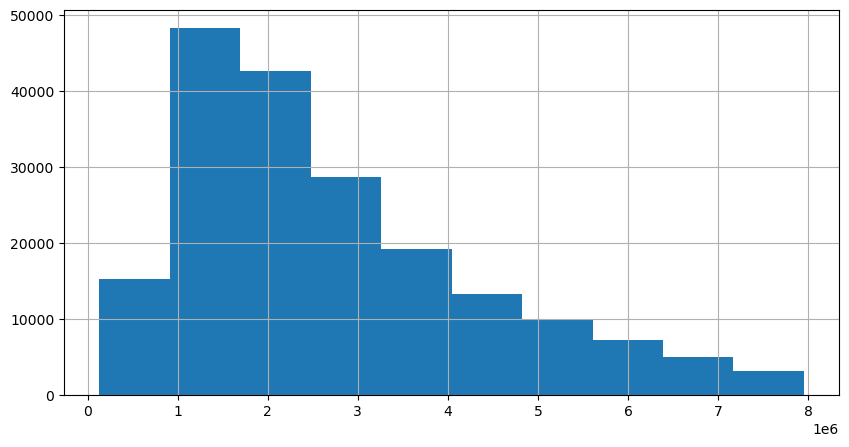

In [8]:
#Hacer histograma de importe_valor_concluido
cdmx["importe_valor_concluido"].hist(bins=10, figsize=(10, 5))

<Axes: >

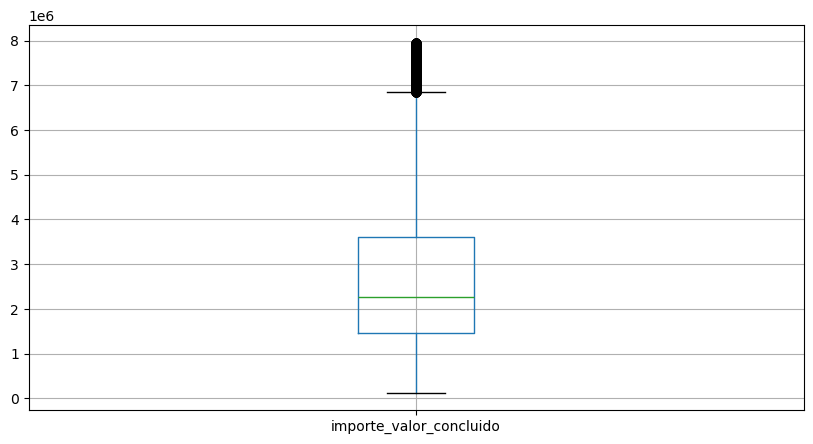

In [9]:
#Boxplot de importe_valor_concluido
cdmx.boxplot(column='importe_valor_concluido', figsize=(10, 5
))

<Axes: >

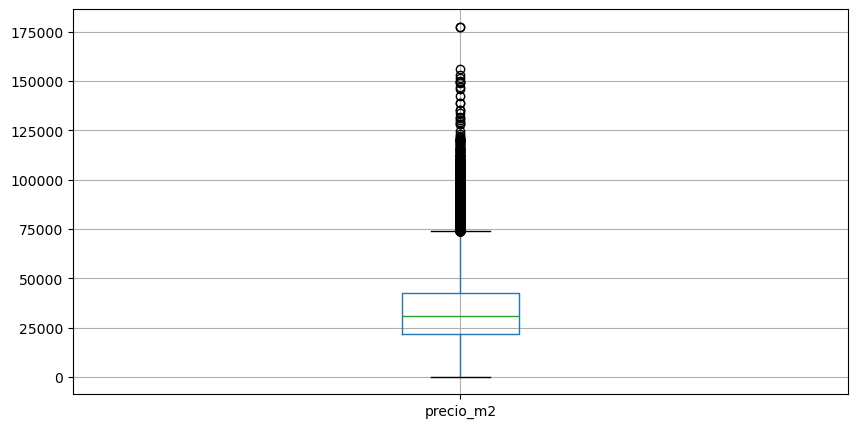

In [10]:
cdmx.boxplot(column='precio_m2', figsize=(10, 5))

In [11]:
#Dejar solo latitud, longitud, importe_valor_concluido,precio_m2
cdmx = cdmx[['latitud', 'longitud', 'importe_valor_concluido', 'precio_m2']]
cdmx

,latitud,longitud,importe_valor_concluido,precio_m2
117,19.487513,-99.181712,1104000.0,24631.860776
143,19.392811,-99.145956,2274000.0,37780.362186
169,19.441472,-99.142697,1748000.0,28179.912945
172,19.365023,-99.142792,2389000.0,37102.034477
193,19.458079,-99.123744,1699000.0,29573.542211
...,...,...,...,...
3861922,19.381929,-99.149461,3062000.0,40903.018969
3861936,19.406708,-99.077150,3130000.0,39600.202429
3861942,19.306642,-99.173020,2946000.0,31521.506527
3861945,19.303792,-99.039670,945000.0,19164.469682


In [12]:
#Guardar csv
cdmx.to_csv("cdmx_avaluos.csv", index=False)

In [13]:
#Url colonias zip

url="https://datos.cdmx.gob.mx/dataset/d8f83ce7-163d-4c2a-96e0-ae38d304c4a0/resource/e3bbadb4-f3de-4c52-b3f4-a4ffea4466a3/download/colonias_iecm_2022.zip"

response = requests.get(url)
from zipfile import ZipFile
with ZipFile(BytesIO(response.content)) as z:
    z.extractall("colonias")

In [21]:
##Leer colonias
colonias= gpd.read_file("colonias_iecm2022_.shp")
colonias.columns=colonias.columns.str.lower()
#crs
print(colonias.crs)
colonias

EPSG:4326


,entidad,cdt,demarcacio,distritolo,distritol2,cveut,ut,secccompl,seccparc,pobl,geometry
0,9,10,ALVARO OBREGON,18,18,10-001,ABRAHAM GONZALEZ,None,3262,459,"POLYGON ((-99.20451 19.38704, -99.20451 19.387..."
1,9,10,ALVARO OBREGON,18,18,10-002,ACUEDUCTO,3167,"3168, 3169",3188,"POLYGON ((-99.20771 19.39646, -99.20784 19.396..."
2,9,10,ALVARO OBREGON,23,32,10-003,ACUILOTLA,None,3391,1927,"POLYGON ((-99.24489 19.35724, -99.24492 19.357..."
3,9,10,ALVARO OBREGON,23,23,10-004,HACIENDA DE GUADALUPE CHIMALISTAC,None,"3460, 3468",1257,"POLYGON ((-99.18381 19.351, -99.18344 19.35108..."
4,9,10,ALVARO OBREGON,23,23,10-005,AGUILAS 3ER PARQUE,"3508, 3507",None,3832,"POLYGON ((-99.22448 19.35159, -99.22275 19.352..."
...,...,...,...,...,...,...,...,...,...,...,...
1832,9,13,XOCHIMILCO,19,19,13-081,LA NORIA,None,4192,1241,"POLYGON ((-99.12416 19.2672, -99.12406 19.2671..."
1833,9,13,XOCHIMILCO,25,25,13-082,NUEVA TENOCHTITLAN (U HAB),None,4182,246,"POLYGON ((-99.07426 19.25565, -99.07207 19.254..."
1834,9,13,XOCHIMILCO,19,19,13-083,VILLA XOCHIMILCO (U HAB),4194,None,862,"POLYGON ((-99.12756 19.26859, -99.12664 19.268..."
1835,9,13,XOCHIMILCO,25,19,13-084,BOSQUE RESIDENCIAL DEL SUR (U HAB),None,4099,675,"POLYGON ((-99.13183 19.28048, -99.13186 19.280..."


In [22]:
#crear geodataframe con las coordenadas
avaluosgdf= gpd.GeoDataFrame(cdmx, geometry=gpd.points_from_xy(cdmx['longitud'], cdmx['latitud'], crs='EPSG:4326'))
print("Sistema de coordenadas: ",avaluosgdf.crs)

Sistema de coordenadas:  EPSG:4326


In [33]:
#Hacer join espacial
colonias_puntos=colonias.sjoin(avaluosgdf,how="left")
colonias_puntos=colonias_puntos.dropna(subset=["latitud"])
#Agrupar por cveut y calcular mediana de precio_m2
colonias_puntos = colonias_puntos.groupby('cveut').agg({
    'precio_m2': 'median'
}).reset_index()
colonias_puntos
#Eliminar si precio_m2 es nan
colonias_puntos = colonias_puntos[colonias_puntos['precio_m2'].notna()]
#Salvar como excel
colonias_puntos.to_excel("colonias_puntos.xlsx", index=False)